# Fire Inscedents
## Member name: Zipan Huang
#### Fire Inscedent data around neighborhoods in Allegheny county

**Fire incidents in the City of Pittsburgh is a dataset that contains information on fire incidents that occurred in Pittsburgh. This dataset provides valuable insights into the number of fire incidents, their location, and the type of incidents that occur in each neighborhood. In this project, we aim to analyze this dataset to understand the distribution of fire incidents across different neighborhoods in Pittsburgh and identify any trends or patterns that may exist. By doing so, we can gain insights into the fire safety of each neighborhood and identify any areas that may require additional resources to improve fire safety.**

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

**Load the dataset into a pandas DataFrame using the pandas

The dataset name is Fire Incidents in City of Pittsburgh**

In [2]:
# Import the data from Fire Incidents in City of Pittsbugh
df = pd.read_csv('Fires.csv')
df.head()
# https://data.wprdc.org/dataset/fire-incidents-in-city-of-pittsburgh

,call_no,incident_type,type_description,address,alarm_time,alarms,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,F160029985,111.0,Building fire,"800 BLOCK CENTER ST, WILKINSBURG PA 15221",2016-04-21T05:01:04,1,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-16,40.441275,-79.882485
1,F180022058,111.0,Building fire,"1100 BLOCK JANE ST, WILKINSBURG PA 15221",2018-03-13T08:34:43,1,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-21,40.436342,-79.881003
2,F180022102,131.0,Passenger vehicle fire,"SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212",2018-03-13T11:54:23,0,231EN32,2406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1A,NaN,NaN
3,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",2017-05-31T08:39:47,0,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
4,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",2018-03-09T10:26:42,1,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.449009,-80.076607


**Check and clean the data**

In [3]:
# Check the data

# shape and data types of the data
print(df.shape)
print(df.dtypes)

# select numeric columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

# select non numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

(9157, 18)
call_no                   object
incident_type            float64
type_description          object
address                   object
alarm_time                object
alarms                     int64
primary_unit              object
census_tract             float64
neighborhood              object
council_district         float64
ward                     float64
tract                    float64
public_works_division    float64
pli_division             float64
police_zone              float64
fire_zone                 object
latitude                 float64
longitude                float64
dtype: object
['incident_type' 'alarms' 'census_tract' 'council_district' 'ward' 'tract'
 'public_works_division' 'pli_division' 'police_zone' 'latitude'
 'longitude']
['call_no' 'type_description' 'address' 'alarm_time' 'primary_unit'
 'neighborhood' 'fire_zone']


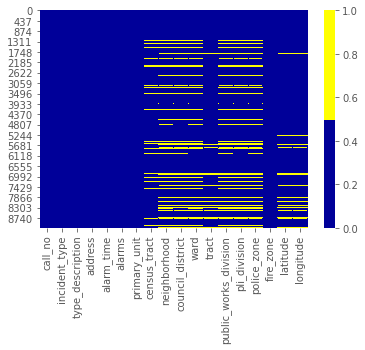

In [4]:
# Clean the dataset by removing any irrelevant or missing data.
# Check missing data: 

cols = df.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))



In [5]:
# if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

call_no - 0%
incident_type - 0%
type_description - 0%
address - 0%
alarm_time - 0%
alarms - 0%
primary_unit - 0%
census_tract - 6%
neighborhood - 14%
council_district - 14%
ward - 14%
tract - 9%
public_works_division - 14%
pli_division - 14%
police_zone - 14%
fire_zone - 0%
latitude - 9%
longitude - 9%


**To group the data by neighborhood.**

In [6]:
# Use the groupby() function in pandas to group the data by neighborhood.

#print(df)
grouped = df.groupby('neighborhood')
grouped_muti = df.groupby(['neighborhood', 'alarms' , 'type_description'])
print(grouped.size())
print(grouped_muti.size())


neighborhood
Allegheny Center        61
Allegheny West          42
Allentown              122
Arlington               50
Arlington Heights       13
                      ... 
Upper Lawrenceville     50
West End                20
West Oakland            58
Westwood                26
Windgap                 20
Length: 91, dtype: int64
neighborhood      alarms  type_description                               
Allegheny Center  0       Brush or brush-and-grass mixture fire              6
                          Dumpster or other outside trash receptacle fire    5
                          Mobile property (vehicle) fire, Other              1
                          Natural vegetation fire, Other                     4
                          Outside equipment fire                             1
                                                                            ..
Windgap           0       Special outside fire, Other                        1
                  1       Building fir

**Count the number of fire incidents in each neighborhood [Count ()]**

In [7]:
# Count the number of fire incidents in each neighborhood using the count() function in pandas.
grouped_fire_df = df.groupby(['neighborhood'])['alarms'].count()
# Print the resulting dataframe
print(grouped_fire_df)

neighborhood
Allegheny Center        61
Allegheny West          42
Allentown              122
Arlington               50
Arlington Heights       13
                      ... 
Upper Lawrenceville     50
West End                20
West Oakland            58
Westwood                26
Windgap                 20
Name: alarms, Length: 91, dtype: int64


**Create a new DataFrame to store the total number of fire incidents in each neighborhood.**

In [8]:
# Create a new DataFrame to store the total number of fire incidents in each neighborhood.
fire_neighborhood_df = pd.DataFrame({'neighborhood': grouped_fire_df.index, 'num_fire_incidents': grouped_fire_df.values})

print(fire_neighborhood_df)

           neighborhood  num_fire_incidents
0      Allegheny Center                  61
1        Allegheny West                  42
2             Allentown                 122
3             Arlington                  50
4     Arlington Heights                  13
..                  ...                 ...
86  Upper Lawrenceville                  50
87             West End                  20
88         West Oakland                  58
89             Westwood                  26
90              Windgap                  20

[91 rows x 2 columns]


**Merge this new DataFrame with the original dataset**

In [9]:
# Merge this new DataFrame with the original dataset using the merge() function in pandas.

fires = df.merge(fire_neighborhood_df, on="neighborhood")
# Print the merged DataFrame

print(fires.head())


      call_no  incident_type        type_description  \
0  F170043431          131.0  Passenger vehicle fire   
1  F140015339          131.0  Passenger vehicle fire   
2  F140004033          111.0           Building fire   
3  F140008680          131.0  Passenger vehicle fire   
4  F150056424          131.0  Passenger vehicle fire   

                                            address           alarm_time  \
0        1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212  2017-05-31T08:39:47   
1  LAFAYETTE AVE & FEDERAL STR, PITTSBURGH PA 15212  2014-02-26T12:17:12   
2        2000 BLOCK LETSCHE ST, PITTSBURGH PA 15214  2014-01-12T15:38:37   
3        1700 BLOCK BELLEAU DR, PITTSBURGH PA 15214  2014-01-30T17:41:23   
4        1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212  2015-07-20T21:48:00   

   alarms primary_unit  census_tract neighborhood  council_district  ward  \
0       0      231EN38        2509.0     Fineview               6.0  25.0   
1       0      231EN38        2614.0     Fineview   

**Visualize the data using a bar chart or any other relevant plot to see the distribution of fire incidents across neighborhoods.**

In [ ]:
import matplotlib.pyplot as plt
# Visualize the data using a bar chart or any other relevant plot to see the distribution of fire incidents across neighborhoods.

# Set the figure size
plt.rcParams['figure.figsize'] = [50, 10]

# Create a bar chart of fire incidents by neighborhood
plt.bar(fires['neighborhood'], fires['alarms'])

# Set the title and axis labels
plt.title('Number of Fire Incidents by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Fire Incidents')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


**This is a bar chart displaying the top 10 neighborhoods with the lowest number of fire incidents, sorted in ascending order**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Set the figure size
plt.rcParams['figure.figsize'] = [10, 10]

# Calculate the sum of alarms for each neighborhood
alarms_sum = fires.groupby('neighborhood')['alarms'].sum().reset_index()

# Sort the data by the number of alarms (ascending) and select the top 10 neighborhoods with the lowest fire incidents
top10_lowest = alarms_sum.sort_values(by='alarms', ascending=True).head(10)

# Create a bar chart of the top 10 neighborhoods with the lowest fire incidents
plt.bar(top10_lowest['neighborhood'], top10_lowest['alarms'])

# Set the title and axis labels
plt.title('Top 10 Neighborhoods with the Lowest Fire Incidents')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Fire Incidents')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


**This will create a bar chart displaying the top 10 neighborhoods with the highest number of fire incidents, sorted in descending order.**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Set the figure size
plt.rcParams['figure.figsize'] = [10, 10]

# Calculate the sum of alarms for each neighborhood
alarms_sum = fires.groupby('neighborhood')['alarms'].sum().reset_index()

# Sort the data by the number of alarms (descending) and select the top 10 neighborhoods with the highest fire incidents
top10_highest = alarms_sum.sort_values(by='alarms', ascending=False).head(10)

# Create a bar chart of the top 10 neighborhoods with the highest fire incidents
plt.bar(top10_highest['neighborhood'], top10_highest['alarms'])

# Set the title and axis labels
plt.title('Top 10 Neighborhoods with the Highest Fire Incidents')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Fire Incidents')

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# Display the plot
plt.show()



**Fire incidents: Sub indicator, analyzing the number of fire incidents in each community and ranking the communities based on this indicator.
Or check the types of fire incidents that occur in each block to see if there are any patterns.**


**Group: Assign higher weights to the number of fire incidents, as security is an important factor in determining the optimal neighborhood. After assigning weights to each sub indicator, calculate the weighted average for each community and rank the communities based on this weighted average.**